<a href="https://colab.research.google.com/github/AkothCarole/House-Prices_Regression/blob/master/Week_7_IP_Caroline_Akoth_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the problem

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

**Define the question**

**Metric for success**

**Experimental design taken**

#Explore the dataset

In [0]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [0]:
#Read the data
#Dataset URL = http://bit.ly/IndependentProjectWeek7Dataset

data = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
data.shape

(21613, 20)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

**Define appropriateness of the data to answer questions**

Data has the right columns, These columns are in the right data types. Also has location to check on the influence of location on price

#**Clean the data**

In [0]:
#Find null values
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No Null values

In [0]:
data.duplicated()
#No Duplicates

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [0]:
#Find Anomalies
data.nunique()
#Alot of columns don't have unique values as seen below. But since we dont need them to be unique we shall use them that way. 

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [0]:
data.shape

(21613, 20)

In [0]:
#Visualize Outliers
#defining a funtion that takes the dataset name and numeric columns list as arguments 
#then returns a visual for the columns_list 
def outlier_visualiser(data, numeric_columns_list, width=10, height=5):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, grid=False)
        next_figure = next_figure + 1
    plt.show()

In [0]:
# Counting the number of outliers for each
#counting number of outliers in our data columns and cheking the percentage for each
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
for col_val in data:
    rows, columns = data.shape
    outliers = detect_outlier(data[col_val])
    outliers_count = len(outliers)
    outliers_percentage = (outliers_count/rows)* 100
    print(f"{col_val} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

id has 0 outliers in total, which is 0.0% of data
price has 406 outliers in total, which is 1.9% of data
bedrooms has 75 outliers in total, which is 0.35% of data
bathrooms has 187 outliers in total, which is 0.87% of data
sqft_living has 248 outliers in total, which is 1.1% of data
sqft_lot has 347 outliers in total, which is 1.6% of data
floors has 8 outliers in total, which is 0.037% of data
waterfront has 163 outliers in total, which is 0.75% of data
view has 829 outliers in total, which is 3.8% of data
condition has 30 outliers in total, which is 0.14% of data
grade has 136 outliers in total, which is 0.63% of data
sqft_above has 254 outliers in total, which is 1.2% of data
sqft_basement has 247 outliers in total, which is 1.1% of data
yr_built has 0 outliers in total, which is 0.0% of data
yr_renovated has 914 outliers in total, which is 4.2% of data
zipcode has 0 outliers in total, which is 0.0% of data
lat has 0 outliers in total, which is 0.0% of data
long has 233 outliers in 

In [0]:
#Drop Outliers using IQR
#q3 = 
#q1 =
#iqr = q3-q1
#fin_outliers = data[~((data < (q1 - 1.5 * iqr)) |(data> (q3 + 1.5 * iqr))).any(axis=1)]
#print(fin_outliers.shape)



# Univariate, Bivariate and Multivariate Analysis

In [0]:
#Univariate, Bivariate and Multivariate Analysis

In [0]:
!apt install libspatialindex-c4v5
!pip install pysal

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-c4v5 is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [0]:
pip install pysal.contrib.viz


ERROR: Could not find a version that satisfies the requirement pysal.contrib.viz (from versions: none)
ERROR: No matching distribution found for pysal.contrib.viz


In [0]:
from pysal.contrib.viz import mapping as maps

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pysal as ps
import geopandas as gpd


In [0]:
#plt.style.use('dark_background')
sns.set(style="whitegrid")

In [0]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
#Create bounding box 
#This defines spatial extent of houses based in lat,long
BBox = (data.long.min(),
         data.long.max(),      
         data.lat.min(),
         data.lat.max())
BBox

(-122.51899999999999, -121.315, 47.1559, 47.7776)

NameError: ignored

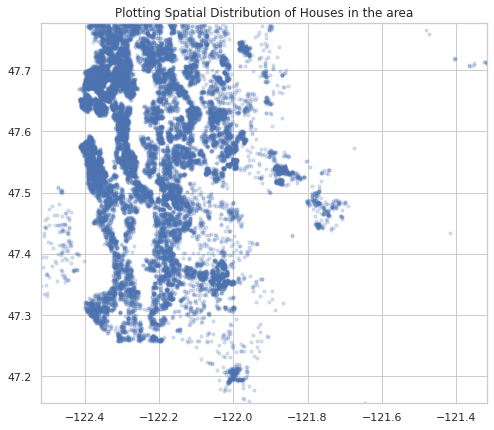

In [0]:
#Plot the points

fig, ax = plt.subplots(figsize = (8,7)) ## Plot the x and Y to see areas that are underserved
ax.scatter(data.long, data.lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Distribution of Houses in the area')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(X, zorder=0, extent = BBox, aspect= 'equal')

This helps us understand the spatial distribution of house. 
In theory, sparse distribution of houses could mean two things:
1. Area lacks utilities and services thus not inviting development and therefore houses are cheap
2. Area is a high end development area thus prices are relative high

We can determine this by visualizing the distribution of houses based on price

AttributeError: ignored

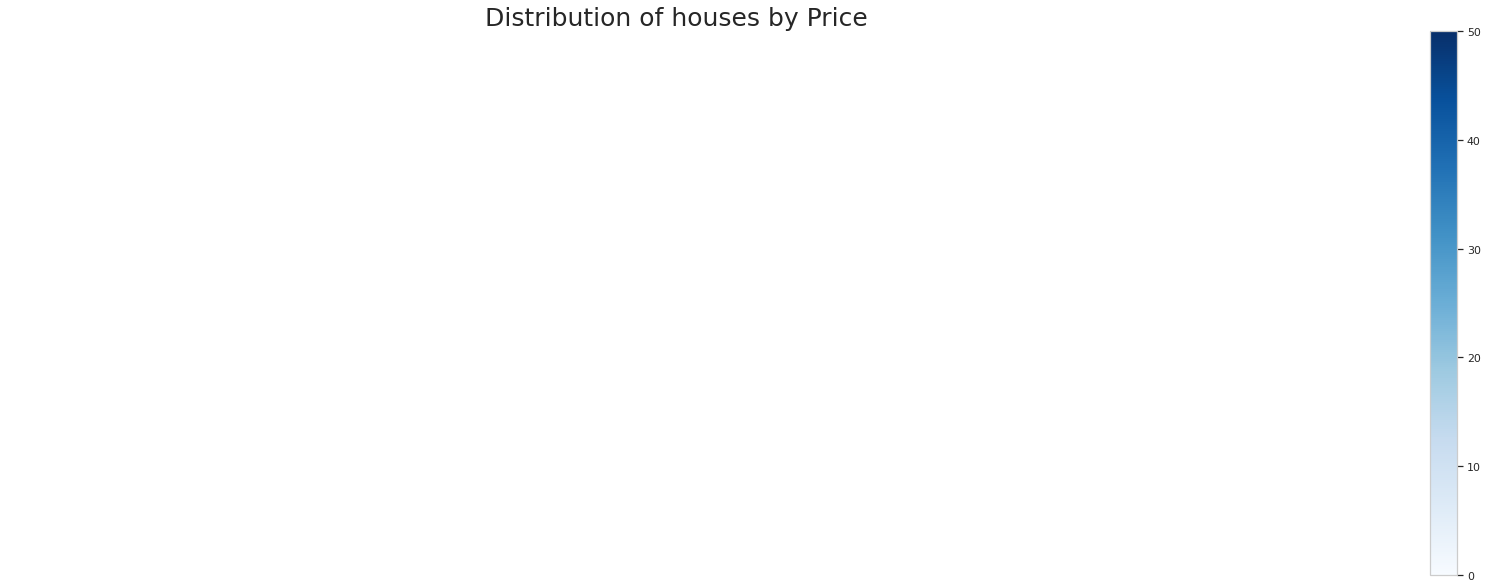

In [0]:
# Select column to be used for visualisation
variable = 'price'
# Set range of the map , this will determine the size of the map
vmin, vmax = 0, 50
#Create figure and axes for matplotlib
f, ax = plt.subplots(1, figsize=(30, 10))
ax.axis('off')
# Add title and set data sources
ax.set_title('Distribution of houses by Price', fontdict={'fontsize': '25', 'fontweight' : '3'})
#ax.annotate('colured by price', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
f.colorbar(sm)
sm.set_array([])
data.plot(variable, cmap='Blues',linewidth=0.8 , ax=ax, edgecolor=0.1);
plt.axis('equal')
plt.show

In [0]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

floors
1.0    4.722905e+09
1.5    1.067776e+09
2.0    5.348834e+09
2.5    1.708244e+08
3.0    3.571461e+08
3.5    7.471500e+06
Name: price, dtype: float64


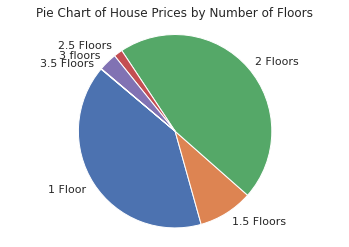

In [0]:
#Pie chart of Price by Floors
floors=data.groupby(['floors'])['price'].sum()
print(floors)

labels = ['1 Floor','1.5 Floors','2 Floors','2.5 Floors','3 floors','3.5 Floors']

plt.pie(floors, labels = labels, shadow = False, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of House Prices by Number of Floors')
plt.show()

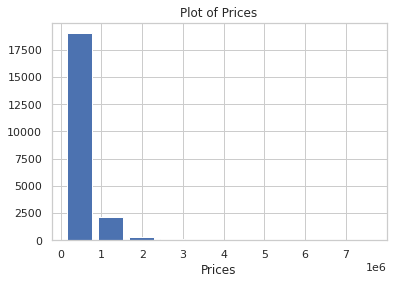

In [0]:
#PLot of prices
plt.hist(data['price'],bins = 10, histtype='bar',rwidth=0.8)
plt.xlabel('Prices')
plt.ylabel('')
plt.title('Plot of Prices')
plt.show()

In [0]:
#Find Correlations
data.corr() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016797,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016797,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.001286,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


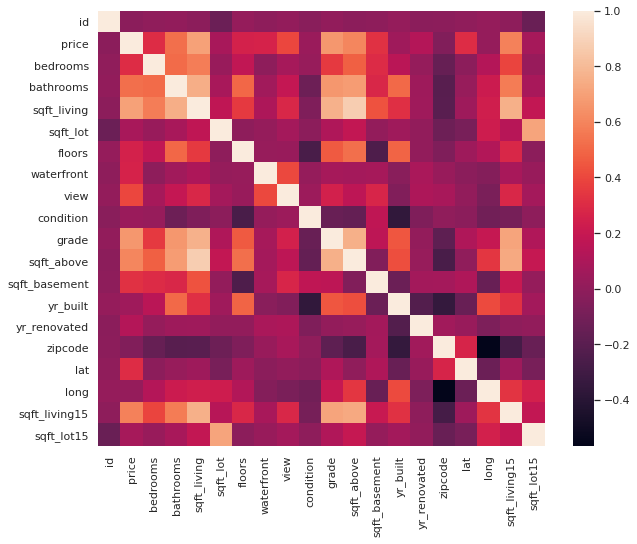

In [0]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values)

#Regression Analysis

Incorporating categorical independent variables into the model

Check Multicollinearity

Provide observations and recommendations on the suitability of each tested model


1. Multiple Linear Regression

In [0]:
#Preview dataset
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#Preview Statistical details
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [0]:
#Divide data into x and Y
X= data[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','yr_renovated','sqft_living15','sqft_lot15']]
y= data['price']

In [0]:
# Dividing our data into training and test sets
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Training the Algorithm
# ---
# To train the algorithm we execute the same code as before, using the fit() method of the LinearRegression class
# ---
# 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# In case of multivariable linear regression, the regression model has to 
# find the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, execute the following
# 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

# From the output, this means that for a unit increase in "price", 
# there is a decrease in bedrooms, bathrooms, sqft , floors
# 
# We can see that "sqft_lot15" and "sqft_living15" have a very little effect on price

,Coefficient
bedrooms,-33103.874175
bathrooms,-14252.562379
sqft_living,195.995927
floors,-10153.351978
waterfront,585743.630604
view,59579.349779
condition,59665.973972
grade,97907.701414
yr_renovated,73.537623
sqft_living15,12.947441


In [0]:
# Making Predictions
# ---
# To make pre-dictions on the test data, execute the following
# ---
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
17384,297000.0,3.413273e+05
722,1580000.0,1.449939e+06
2680,562100.0,3.723375e+05
18754,631500.0,4.695582e+05
14554,780000.0,9.314047e+05
...,...,...
5427,844000.0,8.521045e+05
16547,335500.0,2.886748e+05
4585,369950.0,2.843828e+05
17762,300000.0,1.316268e+05


In [0]:
# Evaluating the Algorithm
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We can see that the value of root mean squared error is 60.07, 
# which is slightly greater than 10% of the mean value of the gas consumption in all states. 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Absolute Error: 147344.56049336793
Mean Squared Error: 47646686113.254105
Root Mean Squared Error: 218281.20879556742


We are now doing to conduct Quantile, Lasso , Ridge and Elastic Net regression to find the best model for prediction

In [0]:
from sklearn.model_selection import KFold

# We will use the same  independent variables for this
X= data[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','yr_renovated','sqft_living15','sqft_lot15']].values
y= data['price'].values

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 241030.48859687976

Training model 2
Model 2 Root Mean Squared Error: 235813.90816793792

Training model 3
Model 3 Root Mean Squared Error: 217540.37304949242

Training model 4
Model 4 Root Mean Squared Error: 221982.40658443197

Training model 5
Model 5 Root Mean Squared Error: 231220.94898288194


Model 3 is closest to our initial RMSE

In [0]:
np.mean(RMSES)

229517.62507632482

In [0]:
from sklearn.model_selection import LeaveOneOut

# We will use the same 4 independent variables for this
X= data[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','grade','yr_renovated','sqft_living15','sqft_lot15']].values
y= data['price'].values

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 21613 folds
trained 21613 models


150959.4621660456

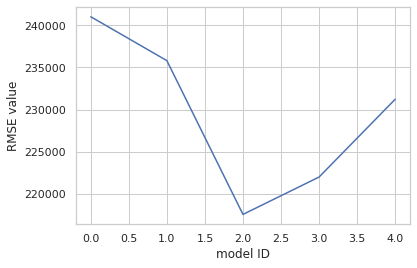

In [0]:
import matplotlib.pyplot as plt

plt.plot(RMSES)
plt.ylabel('RMSE value')
plt.xlabel('model ID')
plt.show()

This plot shows that it would be challenging to get a model that beats 150959.4621660456 average RMSE for this dataset.

2. Quantile Regression

Text(0.5, 1.0, 'Data with constant variance')

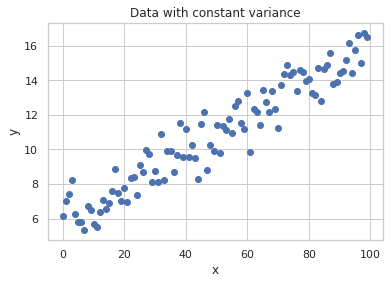

In [0]:
## Generating some data with constant variance /noise
# This is the assumption of linear regression
# 
x = np.arange(100).reshape(100,1)
intercept_ = 6
slope_ = 0.1

## non constant error
error_ = np.random.normal(size = (100,1), loc = 0.0, scale = 1)

## Regression equation
y = intercept_ + slope_ * x + error_

plt.figure(1)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data with constant variance")

# When we move from left to right along the x-axis, 
# we won’t see a lot of variation in the values of y. 
# An linear regression would be the ideal candidate 
# here to model the data.

3. Ridge Regression

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
data.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
#Divide data into x and Y
X= data[['bedrooms','bathrooms','sqft_living','floors','waterfront','condition','yr_renovated','sqft_living15','sqft_lot15']]
y= data['price']

In [0]:
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)

#This value 58608311351.21163 will determine whether rideg regression is superior

58608311351.21163


In [0]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 
#
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [0]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 
print(search.best_params_)
print(abs(search.best_score_) )

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 59120000047.40755 is worse than what the baseline model was(58608311351.21163) 

{'alpha': 0.001}
59120000047.40755


In [0]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

58608529780.80439


In [0]:
# The 58628223920.07278 is lower than the 59120000047.40755. This is because the last results are not cross-validated. 
# In addition, these results indicate that there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,data.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

# The coefficient values are about the same. This means that the penalization made little difference with this dataset.

{'bathrooms': 17117.034992417965,
 'bedrooms': 259.8610460761847,
 'floors': 75.49712120518213,
 'id': -52973.37025885238,
 'price': 8102.244891852998,
 'sqft_living': 752371.9727497085,
 'sqft_lot': 57350.52398947749,
 'view': -0.8683281231751607,
 'waterfront': 72.8522131507043}

In [0]:
#Ridge Regression Coeeficients
coef_dict_ridge = {}
for coef, feat in zip(ridge.coef_,data.columns):
    coef_dict_ridge[feat] = coef
coef_dict_ridge

{'bathrooms': 17106.42365455012,
 'bedrooms': 258.85723792971464,
 'floors': 75.4917521150343,
 'id': -52685.93136158393,
 'price': 8572.319634083007,
 'sqft_living': 752134.7279848623,
 'sqft_lot': 57311.98204268284,
 'view': -0.8648467950894508,
 'waterfront': 73.31937390069865}

4. Lasso Regression

In [0]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [0]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Creating features and target matrixes
#
X= data[['bedrooms','bathrooms','sqft_living','floors','waterfront','view',	'grade','condition','yr_renovated','sqft_living15','sqft_lot15']]
y= data['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [0]:
# We can basically build the Lasso model. 
# But for now, we will train it on the whole dataset and look at an R-squared score and on the model coefficients. 
# Note, that we are not setting the alpha, it is defined as 1.
# 

# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6126205613193316
lasso MSE: 52276376888.179825
lasso coef: [-31708.62008314 -10367.77618004 176839.77309604  -6651.21096792
  48579.1621309   45636.04102066 118332.17168571  38225.80770215
  29363.10023781   7483.34704743 -20750.40552085]


In [0]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6268034219201519
linear score: 0.6268019536105381
lasso MSE: 52981551084.86276
linear MSE: 52981759536.18677
lasso best estimator coef: [-32146.80858872 -14291.11811797 176805.71053204  -3780.16221932
  46343.6746784   44701.04697311 118515.82605713  40551.15139572
  28709.23496846   8825.75931393 -19997.20532914]
linear coef: [-32197.05361728 -14375.73975457 176905.40867942  -3801.06205257
  46357.42271284  44700.51748845 118549.65528217  40572.59029462
  28733.16022187   8832.33719895 -20036.2335669 ]


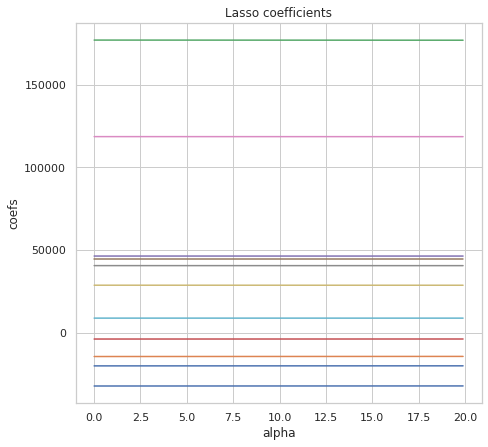

In [0]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# As we can see, Lasso influences less on the large coefficients, but the small ones Lasso reduces to zeroes. 
# Therefore Lasso can also be used to determine which features are important 
# to us and keeps the features that may influence the target variable

5. Elastic Net Regression

In [0]:
#Import Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [74]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))


{'alpha': 1e-05, 'l1_ratio': 0.8}
52800760819.56973


In [75]:
# The best hyperparameters was an alpha set to 0.001 and a l1_ratio of 0.8. 
# With these settings we got an MSE of 52465696081.85296. This is below our baseline model of MSE 52800760819.56973  for the baseline model. 
# Which means that elastic net is doing better than linear regression. 
# For clarity, we will set our hyperparameters to the recommended values and run on the data.
# 
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

52465696081.85296


Residual Plots and Heteroskedasticity Test

In [0]:
#Define Correlations
correlations=data.corr()

In [77]:
#Dataframe with inverse of the correlation matrix
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.028542,0.033760,0.002267,-0.005352,9.295241e-03,0.077219,-0.011600,0.002765,-0.037849,0.022078,-0.048373,1.019747e-02,-1.098595e-02,0.023615,0.017859,0.000315,0.007458,-0.072914,0.009239,0.105511
price,0.033760,3.331694,0.301926,-0.287621,-1.059816e+00,-0.045685,-0.033158,-0.457218,-0.369007,-0.155106,-1.024505,-4.024468e-01,-9.300384e-02,0.699138,-0.071608,0.282609,-0.757054,0.272064,-0.134388,0.098140
bedrooms,0.002267,0.301926,1.679425,-0.487234,-2.914374e-01,0.045161,0.046698,0.021795,0.080697,-0.064841,0.214235,-7.339783e-01,-3.968862e-01,0.197843,0.038950,0.105724,-0.017829,0.042108,0.013026,0.094213
bathrooms,-0.005352,-0.287621,-0.487234,3.375628,-4.983419e+00,-0.020368,-0.672186,0.049214,-0.009708,-0.123686,-0.179471,3.339955e+00,1.373944e+00,-0.996174,-0.253644,0.017405,0.024363,0.030747,0.103709,0.062751
sqft_living,0.009202,-1.054373,-0.288261,-4.978829,-3.384707e+13,-0.106878,0.527039,0.597696,-0.479097,-0.315069,-0.453843,3.051743e+13,1.631011e+13,1.445337,0.088412,-0.235969,0.262880,-0.210571,-0.942696,-0.214327
sqft_lot,0.077219,-0.045685,0.045161,-0.020368,-1.071586e-01,2.109017,0.044866,0.034139,-0.056515,0.034475,-0.042674,-8.142180e-02,1.746460e-02,0.090425,0.023829,-0.006678,0.064889,-0.142610,0.166587,-1.452768
floors,-0.011600,-0.033158,0.046698,-0.672186,5.283104e-01,0.044866,2.012361,-0.000812,-0.036580,0.090957,-0.220239,-9.665754e-01,3.676039e-01,-0.488619,-0.080094,-0.173551,-0.120268,0.162189,0.273838,0.070537
waterfront,0.002765,-0.457218,0.021795,0.049214,5.972879e-01,0.034139,-0.000812,1.266565,-0.442151,0.008786,0.189562,-4.636230e-01,-2.087473e-01,-0.116876,-0.055442,-0.016250,0.113898,-0.010443,0.072970,-0.031186
view,-0.037849,-0.369007,0.080697,-0.009708,-4.781436e-01,-0.056515,-0.036580,-0.442151,1.477161,-0.005080,-0.070505,6.198854e-01,4.047917e-02,0.073637,-0.032922,-0.171895,0.201833,0.043886,-0.311082,-0.021830
condition,0.022078,-0.155106,-0.064841,-0.123686,-3.142170e-01,0.034475,0.090957,0.008786,-0.005080,1.257240,-0.007632,4.023978e-01,8.181785e-02,0.529381,0.210433,0.148053,0.099266,-0.021435,0.082361,-0.030419


In [78]:
revised = data.drop(columns=['sqft_lot15'])

correlations = revised.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
id,1.023362,0.028942,-0.002358,-0.008433,1.969593e-02,0.148540,-0.015063,0.004296,-0.036777,0.023572,-0.050230,1.124136e-02,-1.225667e-02,0.024178,0.018961,0.000680,0.006678,-0.065031,0.015548
price,0.028942,3.327213,0.297624,-0.290487,-1.043887e+00,0.020654,-0.036379,-0.455794,-0.368010,-0.153717,-1.026233,-4.044011e-01,-9.294060e-02,0.699662,-0.070583,0.282949,-0.757780,0.279396,-0.128521
bedrooms,-0.002358,0.297624,1.675295,-0.489985,-2.794943e-01,0.108846,0.043606,0.023162,0.081654,-0.063508,0.212576,-7.333683e-01,-3.976463e-01,0.198346,0.039934,0.106050,-0.018525,0.049147,0.018659
bathrooms,-0.008433,-0.290487,-0.489985,3.373796,-4.976294e+00,0.022050,-0.674246,0.050125,-0.009071,-0.122798,-0.180575,3.339938e+00,1.374428e+00,-0.995839,-0.252989,0.017622,0.023899,0.035435,0.107461
sqft_living,0.019776,-1.045021,-0.278802,-4.972207,-3.384707e+13,-0.251485,0.535015,0.594827,-0.482332,-0.317829,-0.453012,3.051743e+13,1.631011e+13,1.444360,0.086515,-0.236039,0.264251,-0.227856,-0.945422
sqft_lot,0.148540,0.020654,0.108846,0.022050,-2.532749e-01,1.127000,0.092547,0.013058,-0.071271,0.013912,-0.017099,-9.338097e-02,3.555669e-02,0.082674,0.008652,-0.011707,0.075635,-0.251144,0.079731
floors,-0.015063,-0.036379,0.043606,-0.674246,5.360521e-01,0.092547,2.010046,0.000212,-0.035864,0.091956,-0.221481,-9.668680e-01,3.661624e-01,-0.488243,-0.079358,-0.173307,-0.120790,0.167458,0.278055
waterfront,0.004296,-0.455794,0.023162,0.050125,5.940220e-01,0.013058,0.000212,1.266112,-0.442468,0.008344,0.190111,-4.635449e-01,-2.082122e-01,-0.117043,-0.055768,-0.016358,0.114128,-0.012773,0.071106
view,-0.036777,-0.368010,0.081654,-0.009071,-4.804306e-01,-0.071271,-0.035864,-0.442468,1.476940,-0.005389,-0.070121,6.195365e-01,4.064018e-02,0.073521,-0.033150,-0.171971,0.201995,0.042255,-0.312387
condition,0.023572,-0.153717,-0.063508,-0.122798,-3.176441e-01,0.013912,0.091956,0.008344,-0.005389,1.256810,-0.007097,4.027163e-01,8.230743e-02,0.529219,0.210115,0.147948,0.099491,-0.023708,0.080543


None of the dropped based on the removal of sqft_lot15.

Now we'll create a model based on our revised set of independent variables above, then displaying the residual plot for it.

In [79]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = revised.values
y = data['price'].values

X_train, X_test, admit_train, admit_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

1.0913094880954275e-11

We are predicting the price of the houses based on the variables 

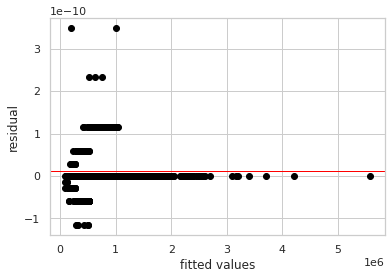

In [80]:
#Plot Residual Plot
import matplotlib.pyplot as plt

plt.scatter(admit_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The Residuals are centered around 0 which does not look so good. 

Let's perform a barlett's test

This establishes as a null hypothesis that the variance is equal for all our datapoints,and the new hypothesis that the variance is different for at least one pair of datapoints.

In [82]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

0.0
the variances are homogeneous!
